In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
base_metadata_pth = Path('/home/tsakalis/ntua/nestor_celvia/metadata')

basic_metadata_file = 'metadata.repository.2024-11-05.json'
clinical_cohort_file = 'clinical.cohort.2024-11-07.json'
biospecimen_file = 'biospecimen.cohort.2024-11-07.json'
gene_expr_file = 'Human__TCGA_OV__UNC__RNAseq__GA_RNA__01_28_2016__BI__Gene__Firehose_RSEM_log2.cct'
# gene_expr_file = "Human__TCGA_OV__UNC__RNAseq__HiSeq_RNA__01_28_2016__BI__Gene__Firehose_RSEM_log2.cct"

gene_mutation_file = 'Human__TCGA_OV__WUSM__Mutation__GAIIx__01_28_2016__BI__Gene__Firehose_MutSig2CV.cbt'

In [3]:
gene_names = pd.read_csv(base_metadata_pth / 'GeneNames.tsv', header=None)

In [4]:
metadata_df = pd.read_json(base_metadata_pth / basic_metadata_file)

clinical_cohort_df = pd.read_json(base_metadata_pth / clinical_cohort_file)

biospecimen_df = pd.read_json(base_metadata_pth / biospecimen_file)
gene_expr_df = pd.read_csv(base_metadata_pth / gene_expr_file, delimiter='\t')

gene_mutation_df = pd.read_csv(base_metadata_pth / gene_mutation_file,
                               delimiter='\t')

In [5]:
latent_vec_pth = Path(
    '/Users/tsakalis/ntua/nestor/nestor_celvia/src/vae_embeddings/latent_vectors_individual'
)

In [6]:
import torch

In [78]:
latent_vec_pth = Path(
    '/home/tsakalis/ntua/nestor_celvia/latent_vectors_individual'
)
latent_vecs = [
    (pth.stem,
     torch.load(pth, map_location=torch.device('cpu')).numpy())
    for pth in latent_vec_pth.glob('*.pt')
]

# latent_vecs = [np.load(pth) for pth in latent_vec_pth.glob('*.npy')]

/tmp/ipykernel_4959/3201932841.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(pth, map_location=torch.device('cpu')).numpy())


In [79]:
all_latent_df = []

for latent in latent_vecs:

    latent_df = pd.DataFrame(latent[1])
    latent_df.columns = [f"emb_{i}" for i in range(1024)]
    latent_df['file_id'] = latent[0].split('_')[0]
    all_latent_df.append(latent_df)

In [80]:
latent_vec_pth = Path(
    '/Users/tsakalis/ntua/nestor/nestor_celvia/src/vae_embeddings/latent_vectors'
)

latent_vecs2 = [(pth.stem, np.load(pth))
                for pth in latent_vec_pth.glob('*.npy')]

# latent_vecs = [np.load(pth) for pth in latent_vec_pth.glob('*.npy')]

In [81]:
metadata_df['submitter_id'] = metadata_df.submitter_id.apply(
    lambda x: '.'.join(x.split('-')[:3]))

In [82]:
merged_genes = pd.merge(gene_expr_df.set_index('attrib_name'),
                        gene_names,
                        left_index=True,
                        right_on=0)


In [83]:
clinical_cohort_df['submitter_id'] = clinical_cohort_df['submitter_id'].apply(
    lambda x: x.replace('-', '.'))

In [84]:
gene_patient = pd.merge(metadata_df,
                        merged_genes.T,
                        left_on='submitter_id',
                        right_index=True)

In [85]:
metadata_latent = pd.merge(metadata_df, pd.concat(all_latent_df), on='file_id')

In [86]:
all_data = pd.merge(metadata_latent,
                    gene_patient.reset_index(drop=True),
                    on='file_id',
                    how='inner')

In [87]:
all_data


,data_format_x,access_x,associated_entities_x,file_name_x,submitter_id_x,data_category_x,annotations_x,file_size_x,md5sum_x,file_id,...,117,34,8,114,71,62,110,27,4,20
0,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
1,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
2,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
3,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
4,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,SVS,open,[{'entity_submitter_id': 'TCGA-04-1348-01A-01-...,TCGA-04-1348-01A-01-TS1.ffb07f65-72b7-494c-abf...,TCGA.04.1348,Biospecimen,NaN,109640757,1d974d73037217e9a9d97e08023d6eeb,019607b4-e183-46ee-b062-9abcbe54ceb5,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438
4582,SVS,open,[{'entity_submitter_id': 'TCGA-04-1348-01A-01-...,TCGA-04-1348-01A-01-TS1.ffb07f65-72b7-494c-abf...,TCGA.04.1348,Biospecimen,NaN,109640757,1d974d73037217e9a9d97e08023d6eeb,019607b4-e183-46ee-b062-9abcbe54ceb5,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438
4583,SVS,open,[{'entity_submitter_id': 'TCGA-04-1348-01A-01-...,TCGA-04-1348-01A-01-TS1.ffb07f65-72b7-494c-abf...,TCGA.04.1348,Biospecimen,NaN,109640757,1d974d73037217e9a9d97e08023d6eeb,019607b4-e183-46ee-b062-9abcbe54ceb5,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438
4584,SVS,open,[{'entity_submitter_id': 'TCGA-04-1348-01A-01-...,TCGA-04-1348-01A-01-TS1.ffb07f65-72b7-494c-abf...,TCGA.04.1348,Biospecimen,NaN,109640757,1d974d73037217e9a9d97e08023d6eeb,019607b4-e183-46ee-b062-9abcbe54ceb5,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438


In [88]:
# Get unique values of the stratify column
from sklearn.model_selection import train_test_split

unique_values = all_data['submitter_id_x'].unique()

# Split unique values into train and test
train_ids, test_ids = train_test_split(all_data.index,
                                       test_size=0.2,
                                       random_state=42)

In [89]:
all_data

,data_format_x,access_x,associated_entities_x,file_name_x,submitter_id_x,data_category_x,annotations_x,file_size_x,md5sum_x,file_id,...,117,34,8,114,71,62,110,27,4,20
0,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
1,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
2,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
3,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
4,SVS,open,[{'entity_submitter_id': 'TCGA-04-1525-01A-01-...,TCGA-04-1525-01A-01-TS1.e3de5902-0717-4df2-b70...,TCGA.04.1525,Biospecimen,NaN,116111873,e7731a29cf5d6a06f676ea30cc630a32,03256884-9230-4fe0-8a5f-0af13ef7413b,...,9.1865,5.9873,7.9775,9.6108,8.9946,6.2403,8.0137,7.2562,7.7849,7.8019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,SVS,open,[{'entity_submitter_id': 'TCGA-04-1348-01A-01-...,TCGA-04-1348-01A-01-TS1.ffb07f65-72b7-494c-abf...,TCGA.04.1348,Biospecimen,NaN,109640757,1d974d73037217e9a9d97e08023d6eeb,019607b4-e183-46ee-b062-9abcbe54ceb5,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438
4582,SVS,open,[{'entity_submitter_id': 'TCGA-04-1348-01A-01-...,TCGA-04-1348-01A-01-TS1.ffb07f65-72b7-494c-abf...,TCGA.04.1348,Biospecimen,NaN,109640757,1d974d73037217e9a9d97e08023d6eeb,019607b4-e183-46ee-b062-9abcbe54ceb5,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438
4583,SVS,open,[{'entity_submitter_id': 'TCGA-04-1348-01A-01-...,TCGA-04-1348-01A-01-TS1.ffb07f65-72b7-494c-abf...,TCGA.04.1348,Biospecimen,NaN,109640757,1d974d73037217e9a9d97e08023d6eeb,019607b4-e183-46ee-b062-9abcbe54ceb5,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438
4584,SVS,open,[{'entity_submitter_id': 'TCGA-04-1348-01A-01-...,TCGA-04-1348-01A-01-TS1.ffb07f65-72b7-494c-abf...,TCGA.04.1348,Biospecimen,NaN,109640757,1d974d73037217e9a9d97e08023d6eeb,019607b4-e183-46ee-b062-9abcbe54ceb5,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438


In [90]:
train_data = all_data.loc[train_ids]
test_data = all_data.loc[test_ids]

In [91]:
target_labels = all_data.columns[-35:]

In [92]:
genes_ovarian_cancer = [
    "BRCA1", "BRCA2", "TP53", "RAD51C", "RAD51D", "PALB2", "ATM", "CHEK2",
    "PTEN", "ARID1A"
]


In [93]:
input_labels = [f"emb_{i}" for i in range(1024)]

In [94]:
from sklearn.preprocessing import LabelEncoder

encode_p = LabelEncoder().fit_transform(all_data['submitter_id_x'])

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score, f1_score, classification_report, r2_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [96]:
pca = PCA(n_components=2)

pcaed = pca.fit_transform(all_data[input_labels])

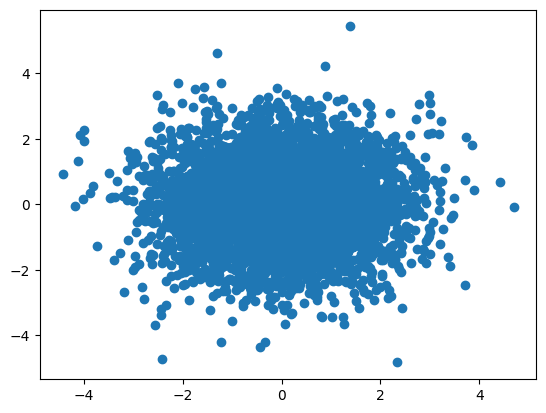

In [103]:
plt.scatter(pcaed[:,0], pcaed[:,1])

In [97]:
X_train, X_test, y_train, y_test = train_data[input_labels], test_data[
    input_labels], train_data[target_labels], test_data[target_labels]

In [98]:
X_test

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_1014,emb_1015,emb_1016,emb_1017,emb_1018,emb_1019,emb_1020,emb_1021,emb_1022,emb_1023
2602,0.313119,-0.452789,0.430273,0.290113,-0.377088,-1.109293,-0.730059,-0.402975,-0.498113,-0.559863,...,0.388517,0.382177,0.250966,-1.073082,0.405433,-0.071640,0.315658,0.214617,0.796543,-1.150046
4210,0.224821,0.406053,0.205371,0.397269,-0.207684,0.211044,0.404571,-0.577902,0.258409,-0.665259,...,0.473877,-0.292471,-0.416404,0.274243,-0.037820,0.940947,0.517767,0.030856,-0.783140,0.667812
1183,-0.189239,-0.329984,-0.247468,-0.033885,1.301982,0.187877,0.204588,-0.068921,0.484843,-0.282609,...,0.694988,0.189658,-0.467403,0.918046,-0.170248,0.041654,0.420535,-0.711606,-0.200743,0.127396
100,0.250240,-0.743159,-1.313267,-0.099759,0.366782,-0.495469,-0.371916,0.535015,0.312452,0.952655,...,-0.064076,-0.387466,-0.228454,0.633106,-0.088699,-0.005787,0.409276,-0.183191,-0.941767,-0.093129
2798,0.847815,-0.940515,0.135647,-0.529378,0.409913,-0.307951,-0.425285,-0.428378,-0.718160,-0.000952,...,0.391905,-0.459054,-0.052741,-0.457697,-0.044791,0.214785,-0.182966,0.107255,-0.075765,-0.619015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,-0.473316,0.224139,0.117838,-0.369477,1.259073,-1.160012,-0.620480,0.502099,-0.867519,-0.066605,...,-0.831466,0.012902,-0.786828,0.367560,0.103964,0.480199,-0.791147,-0.144328,-1.501111,-0.707565
1835,-0.074660,-0.547542,-0.200497,-0.064760,0.541606,0.722295,-1.158866,-0.363415,-0.424096,0.337921,...,0.434931,-1.292473,-0.345812,0.526227,-1.192916,0.777230,-0.026420,-0.324037,-0.397129,0.597147
3742,0.255878,1.557048,-1.035792,0.382196,0.895463,0.218046,0.626525,-0.416842,0.438425,0.056127,...,-0.069869,0.934360,-0.713907,0.072198,0.452194,-0.333380,-0.269447,-0.300806,-0.466204,0.074691
227,-0.292116,-0.542949,0.279529,0.744190,-0.703000,-0.272208,-0.035349,-0.170415,-0.159070,-0.710161,...,0.515918,0.066468,-0.203749,-1.172781,1.056447,0.689127,0.491308,0.035521,0.808227,0.322900


In [99]:
y_train

,43,86,28,101,67,2,75,70,40,59,...,117,34,8,114,71,62,110,27,4,20
3671,7.0815,6.1355,7.8017,7.0236,7.1667,7.3463,7.9609,4.6689,7.5576,8.5167,...,8.453,5.9554,7.9059,9.1826,8.8989,7.3157,8.4969,7.464,7.4432,6.7676
3681,7.0815,6.1355,7.8017,7.0236,7.1667,7.3463,7.9609,4.6689,7.5576,8.5167,...,8.453,5.9554,7.9059,9.1826,8.8989,7.3157,8.4969,7.464,7.4432,6.7676
1425,6.8714,4.8797,8.405,7.7361,7.2791,6.1697,8.1098,7.7592,7.7955,7.9179,...,9.226,5.7288,8.4399,8.9852,9.4487,6.9633,8.2822,6.6904,7.437,7.2743
4072,6.4652,6.5548,7.9417,7.3656,8.0227,6.6872,8.2476,5.7639,8.8153,8.3939,...,8.7509,5.4656,8.011,9.2938,8.9712,7.1908,8.6678,7.5991,7.5855,6.9407
527,6.8199,6.1934,7.806,6.7811,7.3645,7.0328,7.8484,9.0272,6.651,8.1055,...,9.1824,6.4236,7.8974,9.8205,8.5871,5.894,7.8572,7.5705,7.7069,7.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,7.4772,5.848,8.2033,7.5202,8.2831,6.8166,8.4186,7.0939,8.1086,8.3437,...,9.0403,6.0699,8.2965,8.8037,9.1196,6.5004,8.4558,5.9298,7.5717,6.438
466,6.8199,6.1934,7.806,6.7811,7.3645,7.0328,7.8484,9.0272,6.651,8.1055,...,9.1824,6.4236,7.8974,9.8205,8.5871,5.894,7.8572,7.5705,7.7069,7.421
3092,7.4709,5.5516,8.3982,7.8367,8.4115,7.3404,8.7977,7.6047,7.951,8.3318,...,8.7331,5.8354,8.0515,9.6339,7.6517,6.7537,8.526,5.095,8.211,6.5788
3772,7.5359,5.418,8.2305,6.5438,7.4412,6.5136,8.4039,8.3816,8.5539,8.5508,...,8.8807,5.7108,7.6469,10.0642,9.1831,6.3263,8.0837,6.2468,7.9275,7.8044


In [100]:


for label in target_labels:
    model = LGBMRegressor(n_jobs=-1, n_estimators=100, learning_rate=0.001)
    model.fit(X_train, np.log(y_train[label].astype(float)+1))

    # Make predictions
    y_pred = model.predict(X_test)
    # print(mean_squared_error(y_test.flatten(), y_pred.flatten()))
    print(r2_score(np.log(y_test[label].astype(float)+1), y_pred))

-0.003276685998217621
0.0013709195598845536
-0.0023300601064135673


KeyboardInterrupt: 

In [171]:
X_train.shape

(26846, 1024)

In [101]:
import lightgbm as lgb
from sklearn.metrics import r2_score

for label in target_labels:
    # Prepare LightGBM datasets
    train_data = lgb.Dataset(X_train, label=np.log(y_train[label].astype(float)))
    test_data = lgb.Dataset(X_test, label=np.log(y_test[label].astype(float)), reference=train_data)
    
    # Set LightGBM parameters
    params = {
        'objective': 'regression',
        'metric': 'rmse',  # Use RMSE or any relevant regression metric
        'learning_rate': 0.001,
        'num_threads': -1,
        'verbosity': -1,
        'lambda_l1': 0.0,
        'lambda_l2': 0.0,
        # 'num_leaves': 1024, # Larger than typical values
        'min_data_in_leaf': 1

    }
    
    # Train the model
    model = lgb.train(
        params,
        train_data,
        num_boost_round=500,  # Equivalent to n_estimators
        valid_sets=[train_data, test_data],
        valid_names=['train', 'test'],
        # verbose_eval=False
    )
    
    # Make predictions
    y_pred = model.predict(X_test)
    print(np.corrcoef(np.log(y_test[label].astype(float)), y_pred))
    


[[ 1.         -0.09499017]
 [-0.09499017  1.        ]]
[[1.        0.0626644]
 [0.0626644 1.       ]]
[[1.         0.01159172]
 [0.01159172 1.        ]]


KeyboardInterrupt: 

In [ ]:
for i in range(len(target_labels)):
    print(
        np.corrcoef(y_test.values[:, i].flatten().astype(float),
                    y_pred[:, i].flatten()))

In [ ]:
plt.scatter(y_test.values[:, 10].flatten(), y_pred[:, 10].flatten())

In [ ]:
plt.scatter(y_test.values.flatten(), y_pred.flatten())

In [ ]:
for i in range(len(target_labels)):
    model = RandomForestRegressor()
    model.fit(X_train, y_train[:, i])

    # Make predictions
    y_pred = model.predict(X_test)
    # print(mean_squared_error(y_test.flatten(), y_pred.flatten()))
    print(r2_score(y_test[:, i], y_pred))

In [ ]:
def find_vector_duplicates(array1, array2):
    # Convert each vector to a tuple for hashable comparison
    set1 = {tuple(vec) for vec in array1}
    duplicates = [vec for vec in array2 if tuple(vec) in set1]
    return duplicates

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
scaler = MinMaxScaler()
X_scaled = pca.fit_transform(X)


In [ ]:
pcaed = pca.fit_transform(X)

In [ ]:
X_train

In [ ]:
plt.scatter(pcaed[:, 0], pcaed[:, 1])
plt.xlim(-0.445, -0.46)
plt.ylim(-0.05, 0.05)


In [ ]:
correls = []
folds = KFold(5, shuffle=False)

for train_idx, test_idx in folds.split(X, y):

    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[
        train_idx], y[test_idx]
    # Use Random Forest Regressor
    model = RandomForestRegressor(n_estimators=10, n_jobs=-1)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test.flatten(), y_pred.flatten()))
    print(r2_score(y_test, y_pred))
    # correls.append(np.corrcoef(y_test, y_pred)[0, 1])

    # plt.scatter(y_test.flatten(), y_pred.flatten(), s=0.5)

In [ ]:
correls = []
for i in range(len(target_labels)):
    correls.append(np.corrcoef(y_test[:, i], y_pred[:, i])[0, 1])

In [ ]:
np.sort(np.abs(correls))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the plot (example data, replace with actual values)
sort_idx = np.argsort(np.abs(correls))[::-1]
genes = np.array(target_labels)[sort_idx[:112]]

# Plotting
y_pos = np.arange(len(genes))

plt.figure(figsize=(10, 8))
plt.barh(y_pos - 0.2,
         np.abs(correls)[sort_idx[:112]],
         height=0.4,
         label='Pearson',
         color='blue',
         alpha=0.7)
# plt.barh(y_pos + 0.2, spearman, height=0.4, label='Spearman', color='orange', alpha=0.7)

plt.yticks(y_pos, genes)
plt.xlabel("Correlation Coefficient")
plt.title("Correlation Comparison (Pearson vs Spearman)")
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
y_test.shape

In [ ]:
np.corrcoef(y_test.T, y_pred.T)

In [ ]:
pca_vecs = pca.fit_transform(latent_vecs)

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
pca.get_covariance()

In [ ]:
np.corrcoef(pca_vecs[:, 0], [pca_vecs[:, 1]])

In [ ]:
plt.scatter(pca_vecs[:, 0], [pca_vecs[:, 1]])
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)